In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers , initializers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
churn_data=pd.read_csv('/content/drive/MyDrive/Datasets/customer_churn (1).csv')

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.drop('customerID', axis=1, inplace=True)

In [ ]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
churn_data[churn_data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors="coerce")

In [ ]:
churn_data.fillna(0.0, inplace=True)

In [ ]:
churn_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
type(churn_data.TotalCharges)

pandas.core.series.Series

In [ ]:
churn_data.Churn.values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
churn_data[churn_data.Churn == "Yes"].shape

(1869, 20)

In [ ]:
churn_data[churn_data.Churn == "No"].shape

(5174, 20)

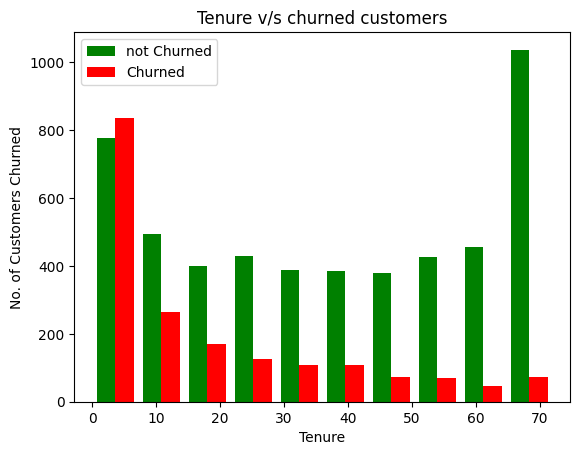

In [ ]:
churn_yes = churn_data[churn_data.Churn == "Yes"].tenure
churn_no = churn_data[churn_data.Churn == "No"].tenure

plt.xlabel("Tenure")
plt.ylabel("No. of Customers Churned")
plt.title("Tenure v/s churned customers")

plt.hist([churn_no , churn_yes],color=['green','red'])
plt.legend(['not Churned','Churned'])
plt.show()

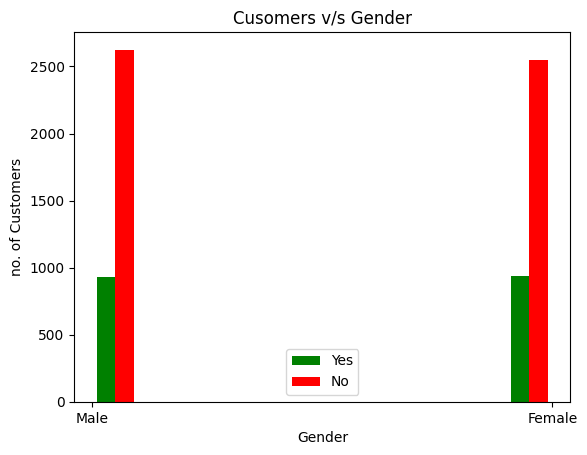

In [ ]:
plt.xlabel("Gender")
plt.ylabel("no. of Customers")
plt.title("Cusomers v/s Gender")

plt.hist([churn_data[churn_data.Churn == "Yes"].gender , churn_data[churn_data.Churn == "No"].gender],color=['green','red'])
plt.legend(['Yes','No'])
plt.show()

In [ ]:
ohe = OneHotEncoder()

In [ ]:
endata = ohe.fit(churn_data)

In [ ]:
endata

OneHotEncoder()

In [ ]:
def unique_col(d):
  for col in d:
    print(col,':',d[col].unique(),',')

In [ ]:
unique_col(churn_data)

gender : ['Female' 'Male'] ,
SeniorCitizen : [0 1] ,
Partner : ['Yes' 'No'] ,
Dependents : ['No' 'Yes'] ,
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] ,
PhoneService : ['No' 'Yes'] ,
MultipleLines : ['No phone service' 'No' 'Yes'] ,
InternetService : ['DSL' 'Fiber optic' 'No'] ,
OnlineSecurity : ['No' 'Yes' 'No internet service'] ,
OnlineBackup : ['Yes' 'No' 'No internet service'] ,
DeviceProtection : ['No' 'Yes' 'No internet service'] ,
TechSupport : ['No' 'Yes' 'No internet service'] ,
StreamingTV : ['No' 'Yes' 'No internet service'] ,
StreamingMovies : ['No' 'Yes' 'No internet service'] ,
Contract : ['Month-to-month' 'One year' 'Two year'] ,
PaperlessBilling : ['Yes' 'No'] ,
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] ,
MonthlyCharges :

In [ ]:
churn_data.replace('No internet service', 'No', inplace=True)

In [ ]:
churn_data.replace('No phone service', 'No', inplace=True)

In [ ]:
unique_col(churn_data)

gender : ['Female' 'Male'] ,
SeniorCitizen : [0 1] ,
Partner : ['Yes' 'No'] ,
Dependents : ['No' 'Yes'] ,
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] ,
PhoneService : ['No' 'Yes'] ,
MultipleLines : ['No' 'Yes'] ,
InternetService : ['DSL' 'Fiber optic' 'No'] ,
OnlineSecurity : ['No' 'Yes'] ,
OnlineBackup : ['Yes' 'No'] ,
DeviceProtection : ['No' 'Yes'] ,
TechSupport : ['No' 'Yes'] ,
StreamingTV : ['No' 'Yes'] ,
StreamingMovies : ['No' 'Yes'] ,
Contract : ['Month-to-month' 'One year' 'Two year'] ,
PaperlessBilling : ['Yes' 'No'] ,
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] ,
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] ,
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] ,
Churn : ['No' 'Yes'] ,


In [ ]:
yes_no_list = ["gender" ,
"SeniorCitizen" ,
"Partner"  ,
"Dependents"  ,
"PhoneService" ,
"MultipleLines" ,
"InternetService" ,
"OnlineSecurity"  ,
"OnlineBackup" ,
"DeviceProtection" ,
"TechSupport" ,
"StreamingTV" ,
"StreamingMovies" ,
"Contract" ,
"PaperlessBilling" ,
"Churn" ]

In [ ]:
churn_data.replace('Yes', 1 , inplace=True)

In [ ]:
churn_data.replace('No', 0 , inplace=True)

In [ ]:
unique_col(churn_data)

gender : ['Female' 'Male'] ,
SeniorCitizen : [0 1] ,
Partner : [1 0] ,
Dependents : [0 1] ,
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] ,
PhoneService : [0 1] ,
MultipleLines : [0 1] ,
InternetService : ['DSL' 'Fiber optic' 0] ,
OnlineSecurity : [0 1] ,
OnlineBackup : [1 0] ,
DeviceProtection : [0 1] ,
TechSupport : [0 1] ,
StreamingTV : [0 1] ,
StreamingMovies : [0 1] ,
Contract : ['Month-to-month' 'One year' 'Two year'] ,
PaperlessBilling : [1 0] ,
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] ,
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] ,
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] ,
Churn : [0 1] ,


In [ ]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
churn_data["PaymentMethod"].replace({"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3},inplace=True)

In [ ]:
churn_data["Contract"].replace({"Month-to-month":0,"One year":1,"Two year":2},inplace=True)

In [ ]:
churn_data["InternetService"].replace({"Fiber optic":1,"DSL":2,},inplace=True)

In [ ]:
churn_data['gender'].replace({'Male': 1,'Female':0},inplace=True)

In [ ]:
churn_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
to_scale = ["tenure","MonthlyCharges","TotalCharges"]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
churn_data[to_scale] = scaler.fit_transform(churn_data[to_scale])

In [ ]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.017462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,2,1,0,1,1,1,1,1,1,1,0.662189,0.229194,0
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,3,0.845274,0.847792,0
7040,0,0,1,1,0.152778,0,0,2,1,0,0,0,0,0,0,1,0,0.112935,0.039892,0
7041,1,1,1,0,0.055556,1,1,1,0,0,0,0,0,0,0,1,1,0.558706,0.035303,1


In [ ]:
X = churn_data.drop("Churn",axis =1)

In [ ]:
y= churn_data.Churn

In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.012453
3,1,0,0,0,0.625000,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,2,1,0,1,1,1,1,1,1,1,0.662189,0.229194
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,3,0.845274,0.847792
7040,0,0,1,1,0.152778,0,0,2,1,0,0,0,0,0,0,1,0,0.112935,0.039892
7041,1,1,1,0,0.055556,1,1,1,0,0,0,0,0,0,0,1,1,0.558706,0.035303


In [ ]:
churn_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = Sequential([
    layers.Dense(1, input_shape=(19,) ,activation = "sigmoid",),
])

model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-88-50c337ac4144>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_150863]

In [ ]:
y_test_pre = model.predict(X_test)

In [ ]:
y_test_pre.shape

In [ ]:
y_test_pre[:6]

In [ ]:
y_predicted = []
for i in y_test_pre:
  if i<0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)

In [ ]:
len(y_predicted)

In [ ]:
print(classification_report(y_test , y_predicted))

ValueError: Found input variables with inconsistent numbers of samples: [1409, 0]

In [ ]:
cm = confusion_matrix(y_test , y_predicted)

In [ ]:
cm

array([[   0, 1037],
       [   0,  372]])

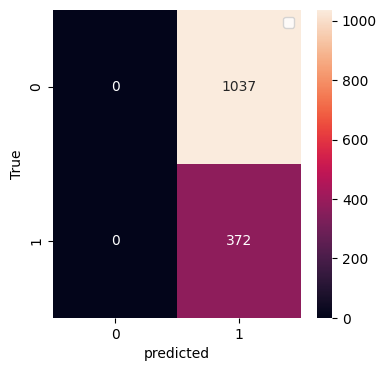

In [ ]:
plt.figure(figsize = (4,4))
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("True")
plt.legend()